In [1]:
#import libraries
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib
from matplotlib import pyplot
%matplotlib inline
import numpy

Using TensorFlow backend.


In [2]:
import glob
from keras.layers import Dropout

In [3]:
import pandas as pd
reading_dates=pd.date_range('2011-01-01',freq='W',periods=28)
print(reading_dates)

DatetimeIndex(['2011-01-02', '2011-01-09', '2011-01-16', '2011-01-23',
               '2011-01-30', '2011-02-06', '2011-02-13', '2011-02-20',
               '2011-02-27', '2011-03-06', '2011-03-13', '2011-03-20',
               '2011-03-27', '2011-04-03', '2011-04-10', '2011-04-17',
               '2011-04-24', '2011-05-01', '2011-05-08', '2011-05-15',
               '2011-05-22', '2011-05-29', '2011-06-05', '2011-06-12',
               '2011-06-19', '2011-06-26', '2011-07-03', '2011-07-10'],
              dtype='datetime64[ns]', freq='W-SUN')


In [4]:
path='csv/'
files=glob.glob("csv/*.csv")
data=[]
names=[]
for file in files:
    df=read_csv(file,header=None,names=['Av','Mx_rt','Mn_rt','Avg_rt','th'])
    df['R_dates']=reading_dates
    df=df.set_index('R_dates')
    names.append(file)
    data.append(df)

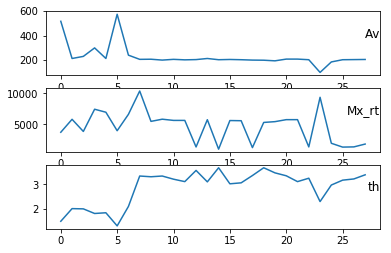

In [5]:
values=data[35].values
groups = [0, 1, 4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(data[50].columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [6]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    #n_in number of lag observations
    #n_out number of next observations
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [7]:
#from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import LabelEncoder
from numpy import concatenate
#from pandas import DataFrame
#from pandas import concat
#encoder =LabelEncoder()
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = data[0].values
    # integer encode direction
    #encoder = LabelEncoder()
    #values[:,4] = encoder.fit_transform(values[:,4])
    # ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#reframed = series_to_supervised(scaled, 8, 4)
# frame as supervised learning
reframed = series_to_supervised(scaled, 12, 4)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)
print(reframed.head())
# drop columns we don't want to predict

    var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var1(t-11)  \
12    0.045455    0.145173    0.248548    0.532258    0.547170    0.022727   
13    0.022727    0.155122    0.145394    0.483871    0.443397    0.022727   
14    0.022727    0.020265    0.150456    0.725806    0.688679    0.022727   
15    0.022727    0.379145    0.078506    0.435484    0.424529    0.000000   
16    0.000000    0.436625    0.103154    0.661290    0.518868    0.022727   

    var2(t-11)  var3(t-11)  var4(t-11)  var5(t-11)    ...      var1(t+2)  \
12    0.155122    0.145394    0.483871    0.443397    ...       0.204545   
13    0.020265    0.150456    0.725806    0.688679    ...       0.204545   
14    0.379145    0.078506    0.435484    0.424529    ...       0.204545   
15    0.436625    0.103154    0.661290    0.518868    ...       0.204545   
16    0.119749    0.139419    0.838710    0.745283    ...       0.272727   

    var2(t+2)  var3(t+2)  var4(t+2)  var5(t+2)  var1(t+3)  var2(t+3)  \
12

In [8]:
reframed

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var1(t+2),var2(t+2),var3(t+2),var4(t+2),var5(t+2),var1(t+3),var2(t+3),var3(t+3),var4(t+3),var5(t+3)
12,0.045455,0.145173,0.248548,0.532258,0.547170,0.022727,0.155122,0.145394,0.483871,0.443397,...,0.204545,0.380251,0.386639,0.387097,0.339623,0.204545,0.255711,0.141826,0.306452,0.226415
13,0.022727,0.155122,0.145394,0.483871,0.443397,0.022727,0.020265,0.150456,0.725806,0.688679,...,0.204545,0.255711,0.141826,0.306452,0.226415,0.204545,0.261238,0.173278,0.354839,0.358490
14,0.022727,0.020265,0.150456,0.725806,0.688679,0.022727,0.379145,0.078506,0.435484,0.424529,...,0.204545,0.261238,0.173278,0.354839,0.358490,0.204545,0.413780,0.193942,0.064516,0.000000
15,0.022727,0.379145,0.078506,0.435484,0.424529,0.000000,0.436625,0.103154,0.661290,0.518868,...,0.204545,0.413780,0.193942,0.064516,0.000000,0.272727,0.025055,0.548465,0.241935,0.235849
16,0.000000,0.436625,0.103154,0.661290,0.518868,0.022727,0.119749,0.139419,0.838710,0.745283,...,0.272727,0.025055,0.548465,0.241935,0.235849,0.204545,0.132277,0.252697,0.322581,0.245283
17,0.022727,0.119749,0.139419,0.838710,0.745283,0.045455,0.091747,0.253942,0.274194,0.283019,...,0.204545,0.132277,0.252697,0.322581,0.245283,0.181818,0.212233,0.269710,0.596774,0.603774
18,0.045455,0.091747,0.253942,0.274194,0.283019,0.022727,0.109064,0.089295,0.661290,0.537736,...,0.181818,0.212233,0.269710,0.596774,0.603774,0.204545,0.471629,0.423900,0.096774,0.056604
19,0.022727,0.109064,0.089295,0.661290,0.537736,0.022727,0.103906,0.096266,0.306452,0.330189,...,0.204545,0.471629,0.423900,0.096774,0.056604,1.000000,0.190862,0.767137,0.000000,0.009434
20,0.022727,0.103906,0.096266,0.306452,0.330189,0.022727,0.000000,0.000000,0.129032,0.132076,...,1.000000,0.190862,0.767137,0.000000,0.009434,0.977273,0.237657,0.594025,0.209677,0.169812
21,0.022727,0.000000,0.000000,0.129032,0.132076,0.000000,0.315033,0.226307,0.387097,0.283019,...,0.977273,0.237657,0.594025,0.209677,0.169812,1.000000,0.247237,0.613195,0.338710,0.254717


In [9]:
preprocessed_data=[]
for i in (range(len(data))):
    values = data[i].values
    # integer encode direction
    #encoder = LabelEncoder()
    #values[:,4] = encoder.fit_transform(values[:,4])
    # ensure all data is float
    values = values.astype('float32')
# normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    reframed = series_to_supervised(scaled,12, 4)
    # drop columns we don't want to predict
    #reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)
    preprocessed_data.append(reframed)

In [10]:
preprocessed_data[0].head()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var1(t+2),var2(t+2),var3(t+2),var4(t+2),var5(t+2),var1(t+3),var2(t+3),var3(t+3),var4(t+3),var5(t+3)
12,0.045455,0.145173,0.248548,0.532258,0.547170,0.022727,0.155122,0.145394,0.483871,0.443397,...,0.204545,0.380251,0.386639,0.387097,0.339623,0.204545,0.255711,0.141826,0.306452,0.226415
13,0.022727,0.155122,0.145394,0.483871,0.443397,0.022727,0.020265,0.150456,0.725806,0.688679,...,0.204545,0.255711,0.141826,0.306452,0.226415,0.204545,0.261238,0.173278,0.354839,0.358490
14,0.022727,0.020265,0.150456,0.725806,0.688679,0.022727,0.379145,0.078506,0.435484,0.424529,...,0.204545,0.261238,0.173278,0.354839,0.358490,0.204545,0.413780,0.193942,0.064516,0.000000
15,0.022727,0.379145,0.078506,0.435484,0.424529,0.000000,0.436625,0.103154,0.661290,0.518868,...,0.204545,0.413780,0.193942,0.064516,0.000000,0.272727,0.025055,0.548465,0.241935,0.235849
16,0.000000,0.436625,0.103154,0.661290,0.518868,0.022727,0.119749,0.139419,0.838710,0.745283,...,0.272727,0.025055,0.548465,0.241935,0.235849,0.204545,0.132277,0.252697,0.322581,0.245283


In [11]:
type(preprocessed_data)

list

In [12]:
#shape = (2700, 6)

#zeros_array = numpy.zeros(shape)
flatten_data=[]
for sublist in preprocessed_data:
    for item in sublist.values:
        #numpy.append(zeros_array,item)
        #print(type(item))
        #zeros_array.append(item)
        flatten_data.append(item)
flatten_data=numpy.array(flatten_data)

In [13]:
#import itertools
#flattened_list  = list(itertools.chain(*flat_data))
#x=[l.tolist() for l in flat_data]

In [14]:
#numpy.array(flat_data)
#type(flat_data)
print(flatten_data)

[[0.0454545  0.14517318 0.24854773 ... 0.14182574 0.3064518  0.22641516]
 [0.02272725 0.15512161 0.1453942  ... 0.17327803 0.35483885 0.35849047]
 [0.02272725 0.0202653  0.15045649 ... 0.19394195 0.06451607 0.        ]
 ...
 [0.13333333 0.03761206 0.04252559 ... 0.2696761  0.6084656  0.59621453]
 [0.0666666  0.09964921 0.05056295 ... 0.16432953 0.50264543 0.4921136 ]
 [0.04999995 0.12439912 0.08253156 ... 0.1449804  0.67724866 0.67192435]]


In [36]:
print(flatten_data.shape)
import random
random.shuffle(flatten_data)

(1300, 80)


In [39]:
# split into train and test sets
train = flatten_data[:1170,:]
test = flatten_data[1170:,:]
# split into input and outputs
train_X, train_y = train[:, :60], train[:,60:]
test_X, test_y = test[:, :60], test[:,60:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 12, 5))
test_X = test_X.reshape((test_X.shape[0], 12, 5))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1170, 12, 5) (1170, 20) (130, 12, 5) (130, 20)


In [17]:
from keras import regularizers

In [87]:
# design network
model = Sequential()
model.add(LSTM(60, input_shape=(train_X.shape[1], train_X.shape[2]))) #,return_sequences=True
model.add(Dropout(0.7))
#model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(Dropout(0.7))
model.add(Dense(20))#,activation="relu",activity_regularizer=regularizers.l1(0.01)
model.compile(loss='mse', optimizer='adam')  #'mae mse
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 60)                15840     
_________________________________________________________________
dropout_15 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 20)                1220      
Total params: 17,060
Trainable params: 17,060
Non-trainable params: 0
_________________________________________________________________


In [88]:
# fit network
history = model.fit(train_X, train_y, epochs=150, batch_size=2, validation_data=(test_X, test_y), verbose=2, shuffle=True)

Train on 1170 samples, validate on 130 samples
Epoch 1/150
 - 11s - loss: 0.1033 - val_loss: 0.0650
Epoch 2/150
 - 9s - loss: 0.0721 - val_loss: 0.0650
Epoch 3/150
 - 9s - loss: 0.0649 - val_loss: 0.0631
Epoch 4/150
 - 9s - loss: 0.0626 - val_loss: 0.0631
Epoch 5/150
 - 10s - loss: 0.0603 - val_loss: 0.0641
Epoch 6/150
 - 9s - loss: 0.0590 - val_loss: 0.0625
Epoch 7/150
 - 9s - loss: 0.0591 - val_loss: 0.0655
Epoch 8/150
 - 9s - loss: 0.0579 - val_loss: 0.0628
Epoch 9/150
 - 9s - loss: 0.0581 - val_loss: 0.0626
Epoch 10/150
 - 9s - loss: 0.0573 - val_loss: 0.0627
Epoch 11/150
 - 9s - loss: 0.0569 - val_loss: 0.0629
Epoch 12/150
 - 9s - loss: 0.0570 - val_loss: 0.0623
Epoch 13/150
 - 9s - loss: 0.0566 - val_loss: 0.0625
Epoch 14/150
 - 9s - loss: 0.0569 - val_loss: 0.0645
Epoch 15/150
 - 9s - loss: 0.0564 - val_loss: 0.0616
Epoch 16/150
 - 9s - loss: 0.0560 - val_loss: 0.0632
Epoch 17/150
 - 9s - loss: 0.0562 - val_loss: 0.0618
Epoch 18/150
 - 9s - loss: 0.0557 - val_loss: 0.0624
Epoch 

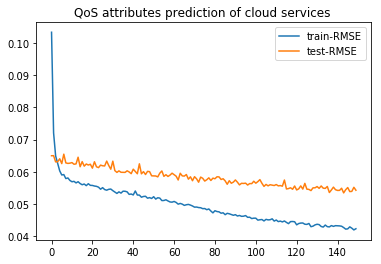

In [89]:
# plot history
pyplot.plot(history.history['loss'], label='train-RMSE')
pyplot.plot(history.history['val_loss'], label='test-RMSE')
pyplot.title("QoS attributes prediction of cloud services ")
pyplot.legend()
pyplot.show()

In [90]:

from math import sqrt
# make a prediction
yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]*test_X.shape[2]))


In [91]:
# invert scaling for forecast
#20/5=4

inv_yhat1 = scaler.inverse_transform(yhat[:,0:5])
inv_yhat2 = scaler.inverse_transform(yhat[:,5:10])
inv_yhat3 = scaler.inverse_transform(yhat[:,10:15])
inv_yhat4 = scaler.inverse_transform(yhat[:,15:20])
inv_yhat = concatenate((inv_yhat1,inv_yhat2 ), axis=1)
inv_yhat = concatenate((inv_yhat,inv_yhat3 ), axis=1)
inv_yhat = concatenate((inv_yhat,inv_yhat4 ), axis=1)
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
inv_y1 = scaler.inverse_transform(test_y[:,0:5])
inv_y2 = scaler.inverse_transform(test_y[:,5:10])
inv_y3 = scaler.inverse_transform(test_y[:,10:15])
inv_y4 = scaler.inverse_transform(test_y[:,15:20])
inv_y = concatenate((inv_y1,inv_y2 ), axis=1)
inv_y = concatenate((inv_y,inv_y3 ), axis=1)
inv_y = concatenate((inv_y,inv_y4 ), axis=1)

In [92]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1660.940


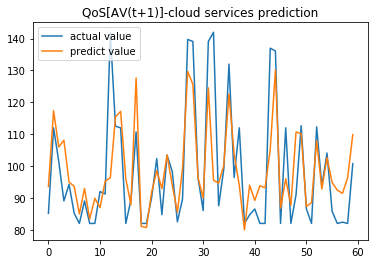

In [93]:
# plot history
pyplot.plot(inv_y[:60,5], label='actual value')
pyplot.plot(inv_yhat[:60,5], label='predict value')
pyplot.title("QoS[AV(t+1)]-cloud services prediction")
pyplot.legend()
pyplot.show()

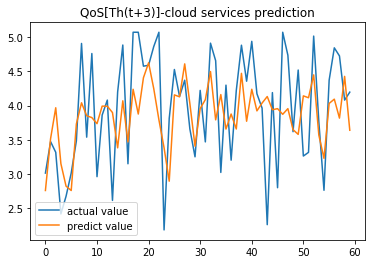

In [94]:
# plot history
pyplot.plot(inv_y[:60,19], label='actual value')
pyplot.plot(inv_yhat[:60,19], label='predict value')
pyplot.title("QoS[Th(t+3)]-cloud services prediction")
pyplot.legend()
pyplot.show()

In [95]:
results=[]
for i in range(20):
    results.append(sqrt(mean_squared_error(inv_y[:,i], inv_yhat[:,i])))

          Av        Mx_rt       Mn_rt     Avg_rt        th
0  14.528631  3957.666990  235.873418  49.888357  0.840856
1  14.809635  3510.943321  184.148749  40.379975  0.690901
2  16.274153  3401.479384  183.653961  39.205434  0.658677
3  14.631213  3931.392247  163.992973  44.118890  0.759694


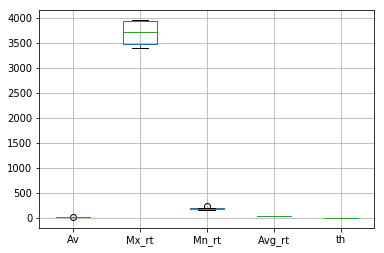

In [96]:
QoS_names=['Av','Mx_rt','Mn_rt','Avg_rt','th']
QoS=[]
QoS_total=[]
for i in range(4):
    QoS=results[i*5:i*5+5]
    QoS_total.append(QoS)
QoS_total=DataFrame(QoS_total)
QoS_total.columns=QoS_names
print(QoS_total)
QoS_total.boxplot()

In [97]:
# predicted values for each provider
preprocessed_data=[]
for i in range(len(data)):
    values = data[i].values
    values = values.astype('float32')
# normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    scaled=DataFrame(scaled)
    reframed = series_to_supervised(scaled[15:28],12, 0)
    #
    #
    preprocessed_data.append(reframed)

In [98]:
#export predicted values for each provider
predicted_data=[]
for i in range(len(preprocessed_data)):
    temp=numpy.array( preprocessed_data[i])
    temp=temp.reshape((temp.shape[0], 12, 5))
    predict_QoS_Pi=model.predict(temp)
    predict_QoS_Pi=predict_QoS_Pi.reshape(4,5)
    predicted_data.append(predict_QoS_Pi)                #(predicted_data[0][0,0:3])
    df_temp=DataFrame(predict_QoS_Pi)
    df_temp.to_csv('csv_predictions/'+names[i][4:])